# 3. Grouping and summarizing
So far you've been answering questions about individual country-year pairs, but you may be interested in aggregations of the data, such as the average life expectancy of all countries within each year. Here you'll learn to use the group by and summarize verbs, which collapse large datasets into manageable summaries.

In [2]:
library(gapminder)
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## The summarize verb
you'll return to the topic of data transformation with `dplyr` to learn more ways to explore your data.

### Data transformation and visualization
Analyses will usually involve a cycle between these steps of data transformation and visualization, as well as additional components of the data science workflow, like modeling. Once you've learned these new verbs, you'll be able to create a much larger variety of informative visualizations with `ggplot2`. 

### Extracting data
Use filter verb to pull out individual observations, such as statistics for the United States in 2007.

In [6]:
gapminder_US_2007 <- gapminder %>%
    filter(country == "United States", year == 2007)
gapminder_US_2007

country,continent,year,lifeExp,pop,gdpPercap
United States,Americas,2007,78.242,301139947,42951.65


### The summarize verb
For example, suppose you want to know the average life expectancy across all countries and years in the dataset. You would do this with the `summarize` verb. Take your gapminder data, pipe it into summarize, and specify that you're creating a summary column called `meanLifeExp`.

In [7]:
gapminder %>%
    summarize(meanLifeExp = mean(lifeExp))

meanLifeExp
59.47444


This is calling the function mean on the variable lifeExp. The mean function takes the average of a set of values, and R comes with many built-in functions like this. Notice that summarize collapses the entire table down into one row. In the output, we see the answer to our question: the mean life expectancy was about 59.47 years.

If you think about it, it doesn't really make sense to summarize across all countries and across all years. It may make more sense to ask questions about averages in a particular year, such as 2007.

In [8]:
gapminder %>%
    filter(year == 2007) %>%
    summarize(meanLifeExp = mean(lifeExp))

meanLifeExp
67.00742


### Summarizing into multiple columns
For example, suppose that along with finding the average life expectancy in 2007, you want to find the total population in that year.

In [9]:
gapminder %>%
    filter(year == 2007) %>%
    summarize(meanLifeExp = mean(lifeExp),
             totalPop = sum(pop))

meanLifeExp,totalPop
67.00742,6251013179


`mean` and `sum` are just two of the built-in functions you could use to summarize a variable within a dataset. 

Another example is `median`: the `median` represents the point in a set of numbers where half the numbers are above that point and half of the numbers are below. Two others are `min`, for minimum, and `max`, for maximum. 

## Exercise

In [10]:
# Summarizing the median life expectancy
# Summarize to find the median life expectancy
gapminder %>%
    summarize(medianLifeExp = median(lifeExp))

medianLifeExp
60.7125


In [11]:
# Summarizing the median life expectancy in 1957
# Filter for 1957 then summarize the median life expectancy
gapminder %>%
    filter(year == 1957) %>%
    summarize(medianLifeExp = median(lifeExp))

medianLifeExp
48.3605


In [12]:
# Summarizing multiple variables in 1957
# Filter for 1957 then summarize the median life expectancy and the maximum GDP per capita
gapminder %>%
    filter(year == 1957) %>%
    summarize(medianLifeExp = median(lifeExp), 
              maxGdpPercap = max(gdpPercap))

medianLifeExp,maxGdpPercap
48.3605,113523.1


---
## The group_by verb
What if we weren't interested just in the average for the year 2007, but for each of the years in the dataset?

We can use the `group_by` verb, which tells `dplyr` to summarize within groups instead of summarizing the entire dataset.

### Summarizing by year


In [13]:
gapminder %>%
    group_by(year) %>%
    summarize(meanLifeExp = mean(lifeExp), 
              totalPop = sum(pop))

year,meanLifeExp,totalPop
1952,49.05762,2406957150
1957,51.50740,2664404580
1962,53.60925,2899782974
1967,55.67829,3217478384
1972,57.64739,3576977158
1977,59.57016,3930045807
1982,61.53320,4289436840
1987,63.21261,4691477418
1992,64.16034,5110710260
1997,65.01468,5515204472


### Summarizing by continent
Suppose you're interested in the average life expectancy and the total population in 2007 within each continent. You can find this by first filtering for the year 2007, grouping by continent (instead of year), and then performing your summary.

In [15]:
gapminder %>%
    filter(year == 2007) %>%
    group_by(continent) %>%
    summarize(meanLifeExp = mean(lifeExp), 
              totalPop = sum(pop))

continent,meanLifeExp,totalPop
Africa,54.80604,929539692
Americas,73.60812,898871184
Asia,70.72848,3811953827
Europe,77.64860,586098529
Oceania,80.71950,24549947


### Summarizing by continent and year
To do so, you can summarize by both year and continent, by adding year comma continent within the group by. 

In [17]:
gapminder %>%
    group_by(year, continent) %>%
    summarize(totalPop = sum(pop), 
              meanLifeExp = mean(lifeExp))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


year,continent,totalPop,meanLifeExp
1952,Africa,237640501,39.13550
1952,Americas,345152446,53.27984
1952,Asia,1395357351,46.31439
1952,Europe,418120846,64.40850
1952,Oceania,10686006,69.25500
1957,Africa,264837738,41.26635
1957,Americas,386953916,55.96028
1957,Asia,1562780599,49.31854
1957,Europe,437890351,66.70307
1957,Oceania,11941976,70.29500


Now the output has one row for each combination of a year and continent. For example, we see the total population and average life expectancy in 1952 for Africa, the Americas, Asia, Europe, and Oceania, followed by each of the continent-level summaries for 1957.

## Exercise

In [18]:
# Summarizing by year
# Find median life expectancy and maximum GDP per capita in each year
gapminder %>%
    group_by(year) %>%
    summarize(medianLifeExp = median(lifeExp), 
              maxGdpPercap = max(gdpPercap))

year,medianLifeExp,maxGdpPercap
1952,45.1355,108382.35
1957,48.3605,113523.13
1962,50.8810,95458.11
1967,53.8250,80894.88
1972,56.5300,109347.87
1977,59.6720,59265.48
1982,62.4415,33693.18
1987,65.8340,31540.97
1992,67.7030,34932.92
1997,69.3940,41283.16


*Notice that median life expectancy across countries is generally going up over time, but maximum GDP per capita is not.*

In [19]:
# Summarizing by continent
# Find median life expectancy and maximum GDP per capita in each continent in 1957
gapminder %>%
    filter(year == 1957) %>%
    group_by(continent) %>%
    summarize(medianLifeExp = median(lifeExp), 
              maxGdpPercap = max(gdpPercap))

continent,medianLifeExp,maxGdpPercap
Africa,40.5925,5487.104
Americas,56.0740,14847.127
Asia,48.2840,113523.133
Europe,67.6500,17909.490
Oceania,70.2950,12247.395


In [26]:
# Find median life expectancy and maximum GDP per capita in each continent in 2007
gapminder %>%
    filter(year == 2007) %>%
    group_by(continent) %>%
    summarize(medianLifeExp = median(lifeExp), 
              maxGdpPercap = max(gdpPercap))

continent,medianLifeExp,maxGdpPercap
Africa,52.9265,13206.48
Americas,72.8990,42951.65
Asia,72.3960,47306.99
Europe,78.6085,49357.19
Oceania,80.7195,34435.37


In [27]:
# Summarizing by continent and year
# Find median life expectancy and maximum GDP per capita in each continent/year combination
gapminder %>%
    group_by(continent, year) %>%
    summarize(medianLifeExp = median(lifeExp), maxGdpPercap = max(gdpPercap))

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


continent,year,medianLifeExp,maxGdpPercap
Africa,1952,38.8330,4725.296
Africa,1957,40.5925,5487.104
Africa,1962,42.6305,6757.031
Africa,1967,44.6985,18772.752
Africa,1972,47.0315,21011.497
Africa,1977,49.2725,21951.212
Africa,1982,50.7560,17364.275
Africa,1987,51.6395,11864.408
Africa,1992,52.4290,13522.158
Africa,1997,52.7590,14722.842


---
## Visualizing summarized data
Now you'll learn how to turn those summaries into informative visualizations, by returning to the ggplot2 package from Chapter 2.

### Summarizing by year
Now instead of viewing the summarized data as a table, let's save it as an object called `by_year`, so you can visualize the data using `ggplot2`.

In [28]:
by_year <- gapminder %>%
    group_by(year) %>%
    summarize(totalPop = sum(pop),
             meanLifeExp = mean(lifeExp))

by_year

year,totalPop,meanLifeExp
1952,2406957150,49.05762
1957,2664404580,51.50740
1962,2899782974,53.60925
1967,3217478384,55.67829
1972,3576977158,57.64739
1977,3930045807,59.57016
1982,4289436840,61.53320
1987,4691477418,63.21261
1992,5110710260,64.16034
1997,5515204472,65.01468


### Visualizing population over time
You would construct the graph with the three steps of `ggplot2`: the data, which is `by_year`. The aesthetics, which puts year on the x-axis and total population on the y-axis. And the type of graph, which in this case is a scatter plot, represented by `geom_point`. Notice that the steps are the same as when you were graphing countries in a scatter plot, even though it's a new dataset. 

In [31]:
library(ggplot2)

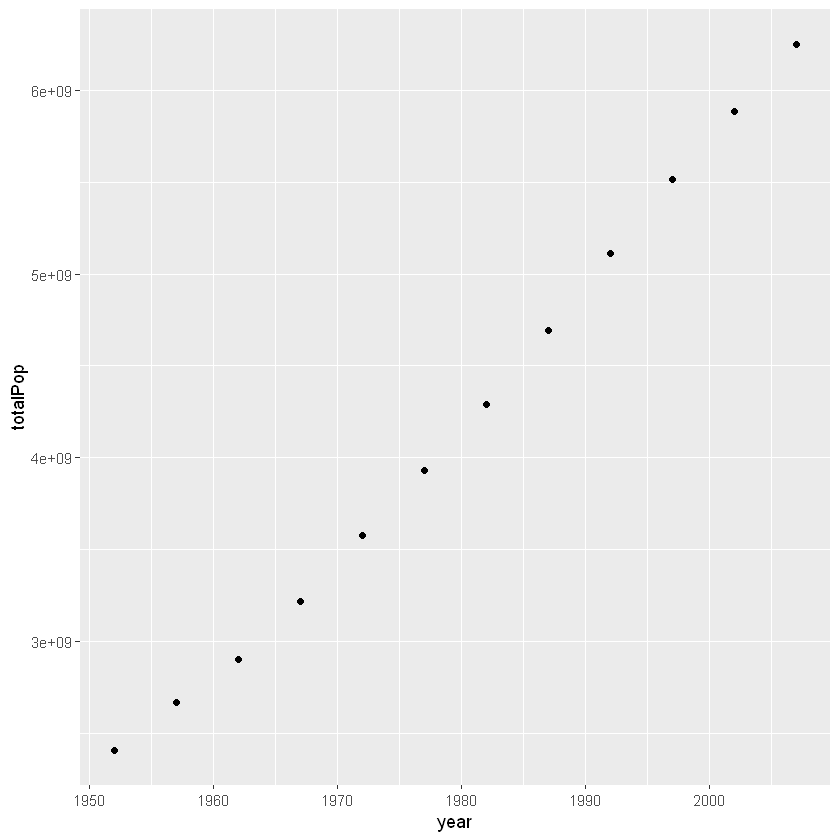

In [32]:
ggplot(by_year, aes(x = year, y = totalPop)) +
    geom_point()

The resulting graph of population by year shows the change in the total population, which is going up over time. `ggplot2` puts the y-axis is in scientific notation, since showing it with nine zeros would be hard to read. 

The global starts a little under 3 times 10 to the 9th power- that's three billion- and goes up to more than 6 billion. You might notice that the graph is a little misleading because it doesn't include zero: you don't have a sense of how much the population grew relative to where it was when it started. This is a good time to introduce another graphing option.

### Starting y-axis at zero
By adding `expand_limits(y = 0)` to the end of the ggplot call, you can specify that you want the y-axis to start at zero. 

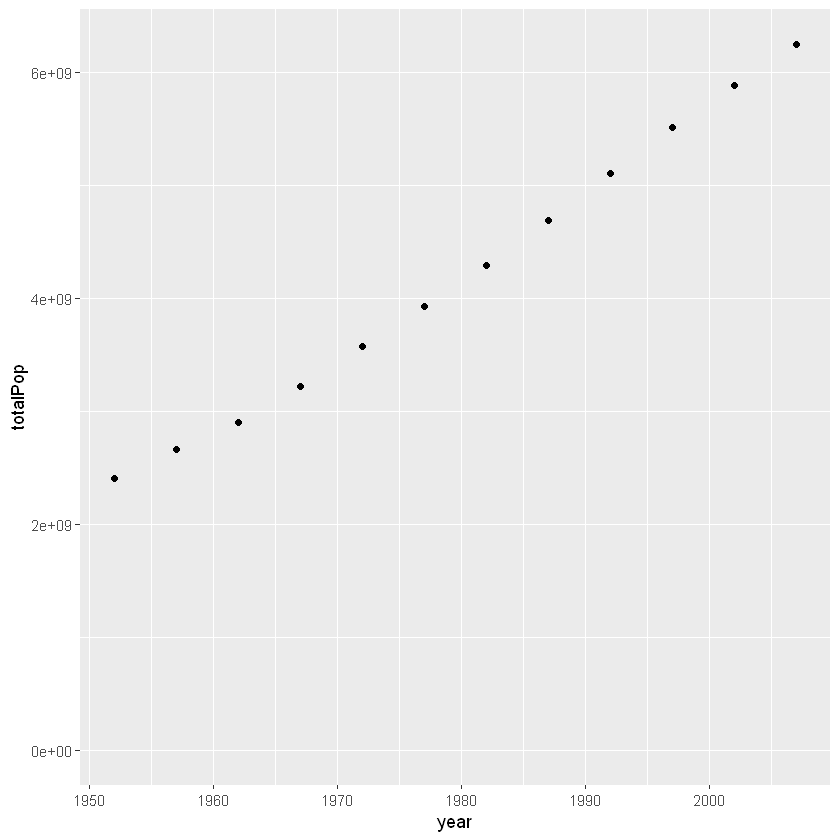

In [33]:
ggplot(by_year, aes(x = year, y = totalPop)) +
    geom_point() +
    expand_limits(y = 0)

Now the graph makes it clearer that the population is almost tripling during this time. You could have created other graphs of summarized data, such as a graph of the average life expectancy over time, by changing the y aesthetic.

### Summarizing by year and continent & Visualizing population by year and continent


In [34]:
by_year_continent <- gapminder %>%
    group_by(year, continent) %>%
    summarize(totalPop = sum(pop), 
              meanLifeExp = mean(lifeExp))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


 By setting color equals continent, you can show five separate trends on the same graph. 

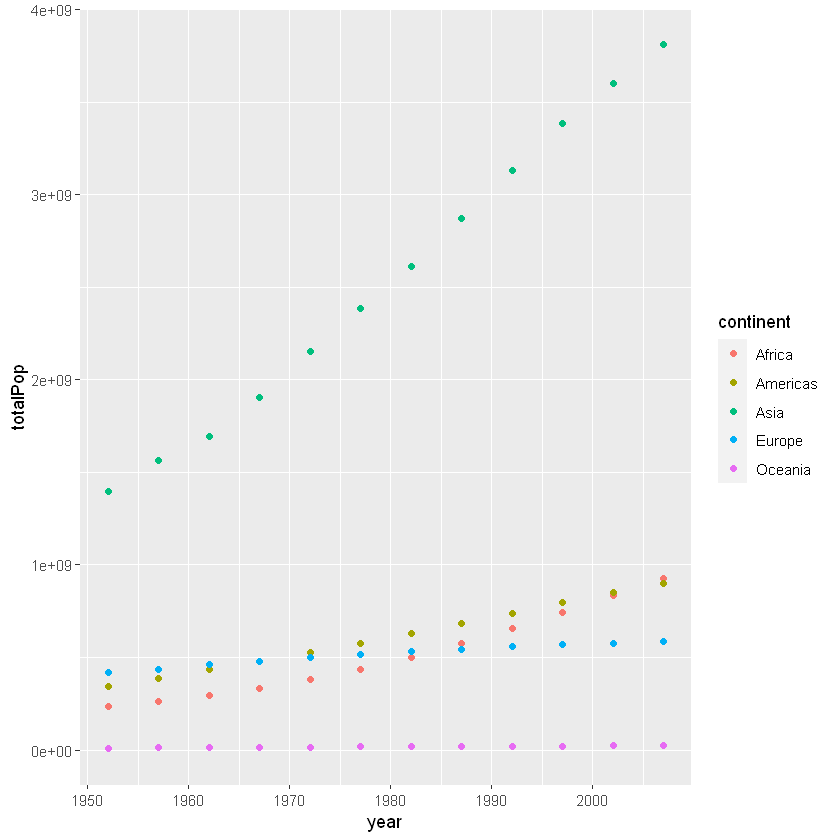

In [35]:
ggplot(by_year_continent, aes(x = year, y = totalPop, color = continent)) +
    geom_point() +
    expand_limits(y = 0)

This lets us see that Asia was always the most populated continent and has been growing the most rapidly, that Europe has a slower rate of growth, and that Africa has grown to surpass both Europe and the Americas in terms of population.

## Exercise

In [36]:
by_year_2 <- gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp), 
            maxGdpPercap = max(gdpPercap))

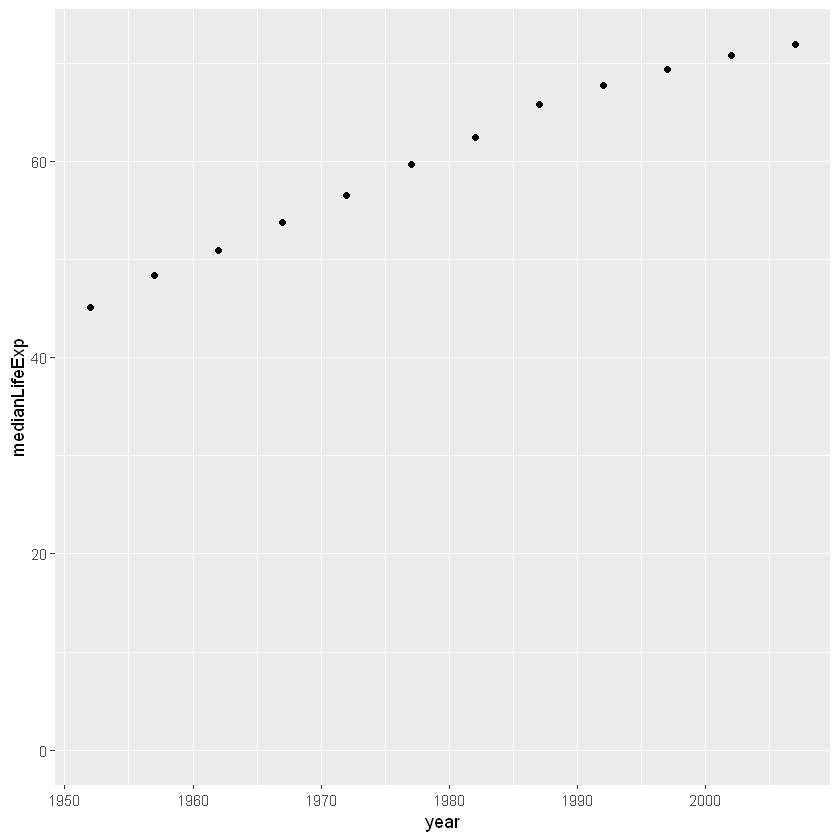

In [37]:
# Visualizing median life expectancy over time
# Create a scatter plot showing the change in medianLifeExp over time
ggplot(by_year_2, aes(x = year, y = medianLifeExp)) +
  geom_point() +
  expand_limits(y = 0)

*It looks like median life expectancy across countries is increasing over time.*

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


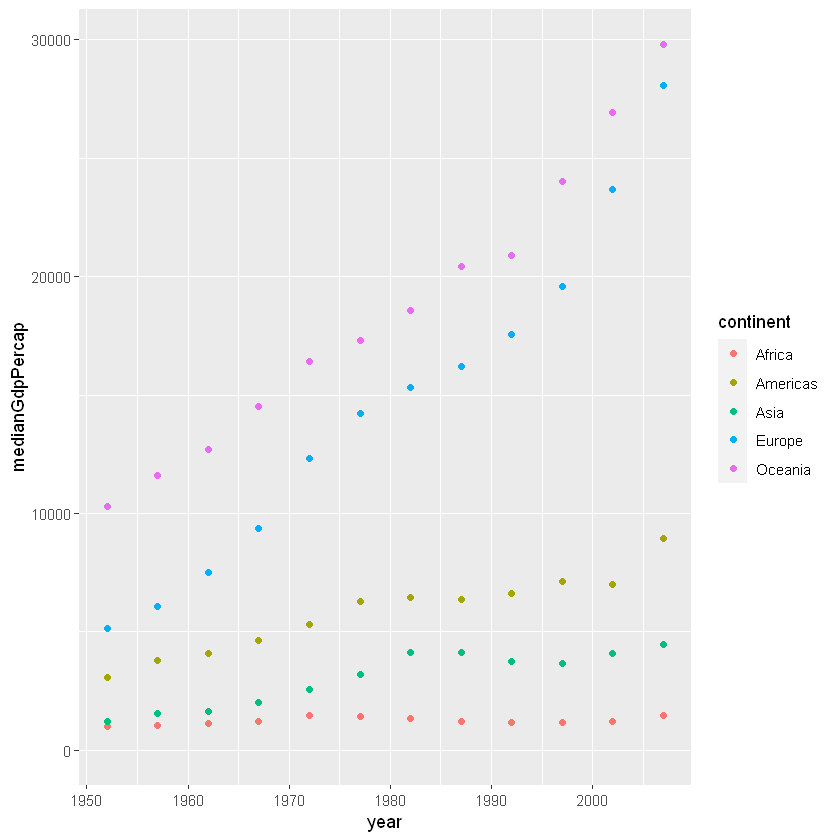

In [38]:
# Visualizing median GDP per capita per continent over time
# Summarize medianGdpPercap within each continent within each year: by_year_continent
by_year_continent_2 <- gapminder %>%
    group_by(continent, year) %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Plot the change in medianGdpPercap in each continent over time
ggplot(by_year_continent_2, aes(x = year, y = medianGdpPercap, color = continent)) +
    geom_point() +
    expand_limits(y = 0)

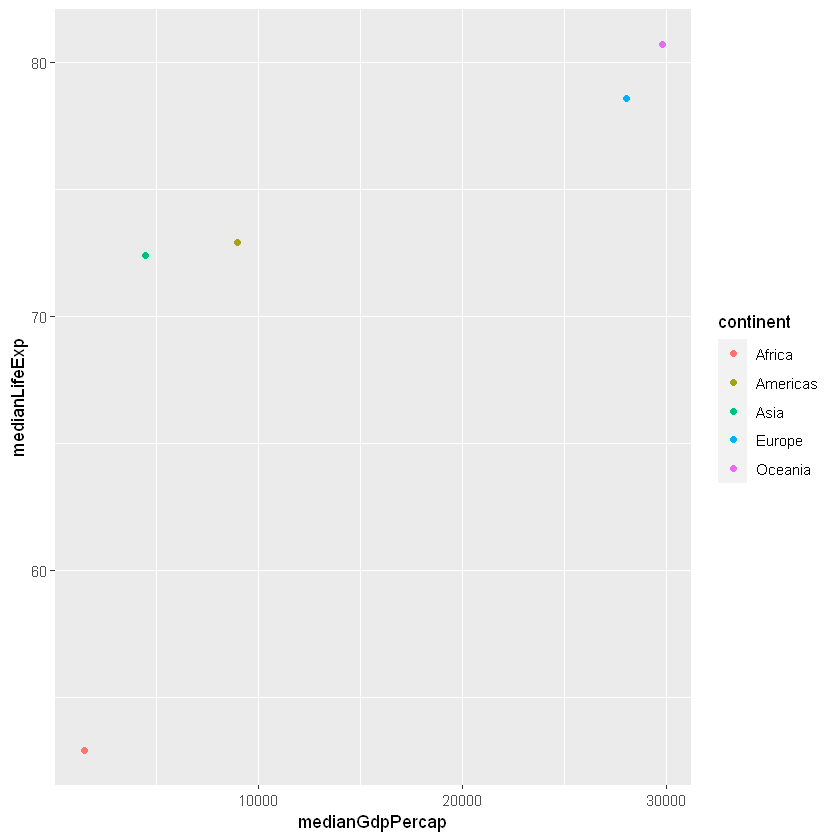

In [39]:
# Comparing median life expectancy and median GDP per continent in 2007
# Summarize the median GDP and median life expectancy per continent in 2007
by_continent_2007 <- gapminder %>%
  filter(year == 2007) %>%
  group_by(continent) %>%
  summarize(medianGdpPercap = median(gdpPercap),
            medianLifeExp = median(lifeExp))

# Use a scatter plot to compare the median GDP and median life expectancy
ggplot(by_continent_2007, aes(x = medianGdpPercap, y = medianLifeExp, color = continent)) +
  geom_point()

---
---
# 4. Types of visualizations
In this chapter, you'll learn how to create line plots, bar plots, histograms, and boxplots. You'll see how each plot requires different methods of data manipulation and preparation, and you’ll understand how each of these plot types plays a different role in data analysis.

## Line plots
### Types of plots
In this chapter, you'll learn to make four more types of graphs. You'll make line plots, which are useful for showing change over time. You'll create bar plots, which are good at comparing statistics for each of several categories. You'll learn to make histograms, which describe the distribution of a one-dimensional numeric variable. And you'll make box plots, which compare the distribution of a numeric variable among several categories.

### Scatter vs line plot
`geom_point()` vs `geom_line()`

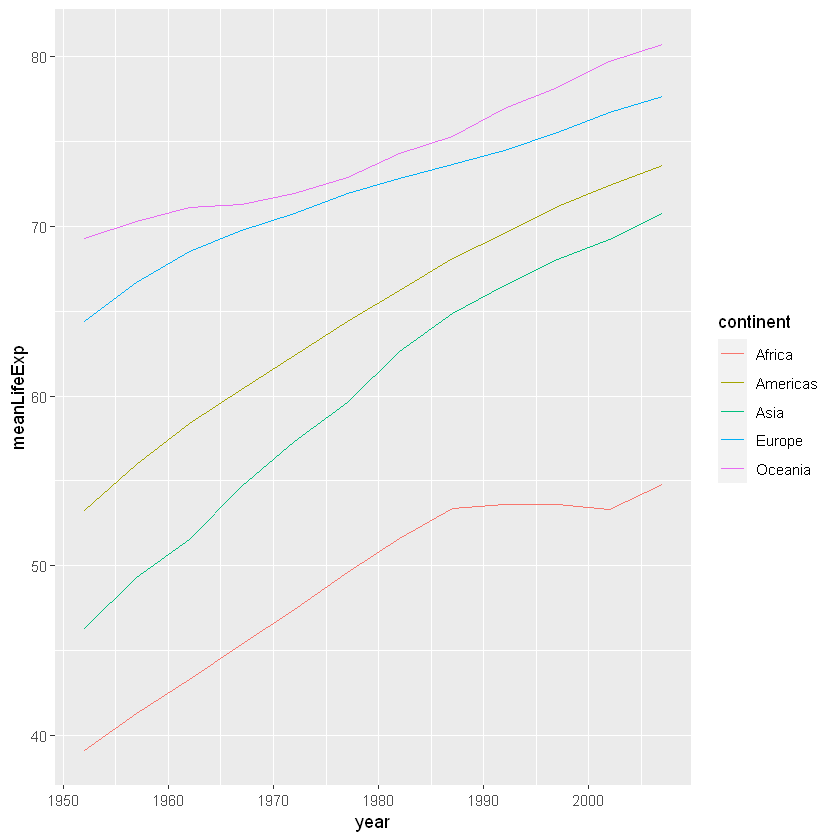

In [41]:
ggplot(by_year_continent, aes(x = year, y = meanLifeExp, color = continent)) +
    geom_line()

## Exercise

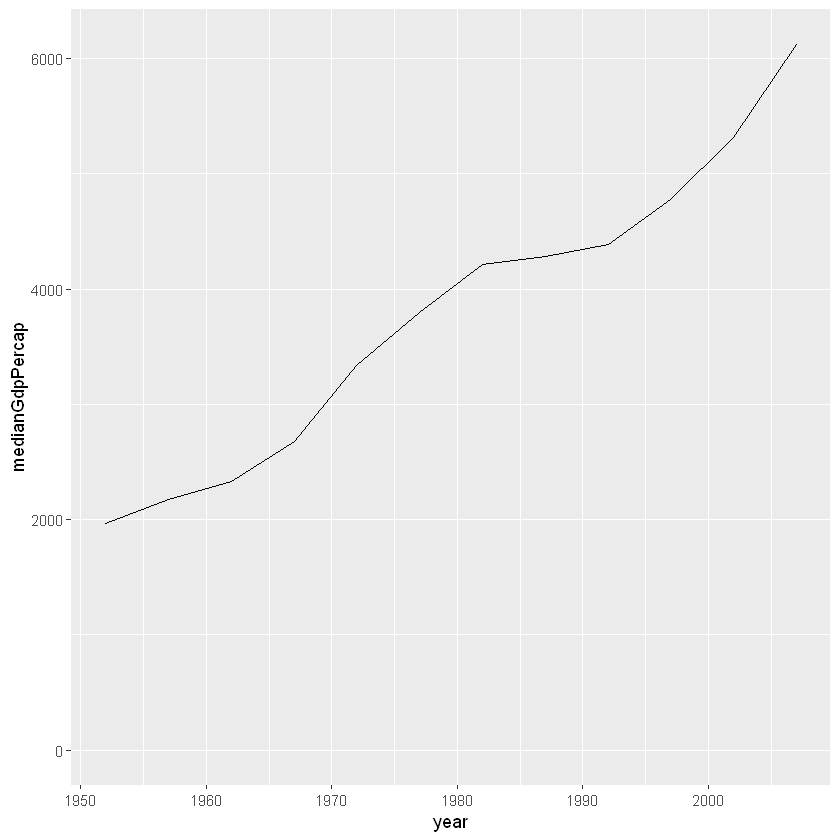

In [42]:
# Visualizing median GDP per capita over time
# Summarize the median gdpPercap by year, then save it as by_year
by_year <- gapminder %>%
    group_by(year) %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap over time
ggplot(by_year, aes(x= year, y = medianGdpPercap)) +
    geom_line() +
    expand_limits(y = 0)

*Looks like median GDP per capita across countries has gone up over time.*

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


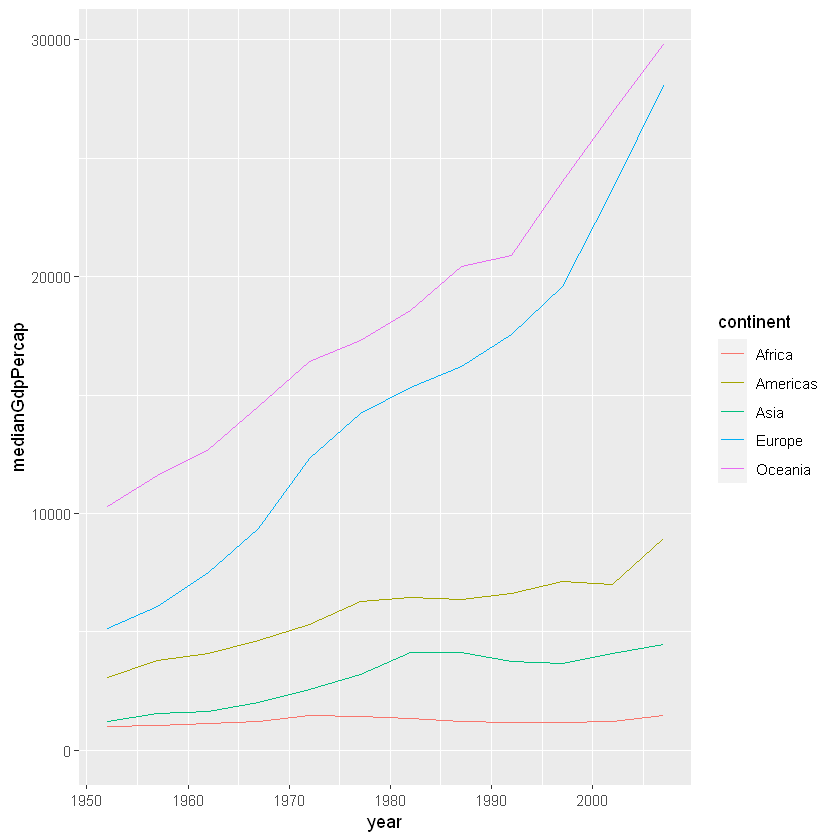

In [43]:
# Visualizing median GDP per capita by continent over time
# Summarize the median gdpPercap by year & continent, save as by_year_continent
by_year_continent <- gapminder %>%
    group_by(year, continent) %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap by continent over time
ggplot(by_year_continent, aes(x = year, y = medianGdpPercap, color = continent)) + 
    geom_line() +
    expand_limits(y = 0)

---
## Bar plots
Bar plots are useful for comparing values across discrete categories, such as continents.

### Summarizing by continent
For example, this code finds the average life expectancy within each continent in the year 2007. That creates a table that looks like this, with one observation for each continent. Instead of just printing the table, you might want to represent the summary visually.

In [45]:
by_continent <- gapminder %>%
    filter(year == 2007) %>%
    group_by(continent) %>%
    summarize(meanLifeExp = mean(lifeExp))

by_continent

continent,meanLifeExp
Africa,54.80604
Americas,73.60812
Asia,70.72848
Europe,77.64860
Oceania,80.71950


### Bar plot
This kind of plot represents the data using one bar for each continent, with the height of the bar representing the mean life expectancy.

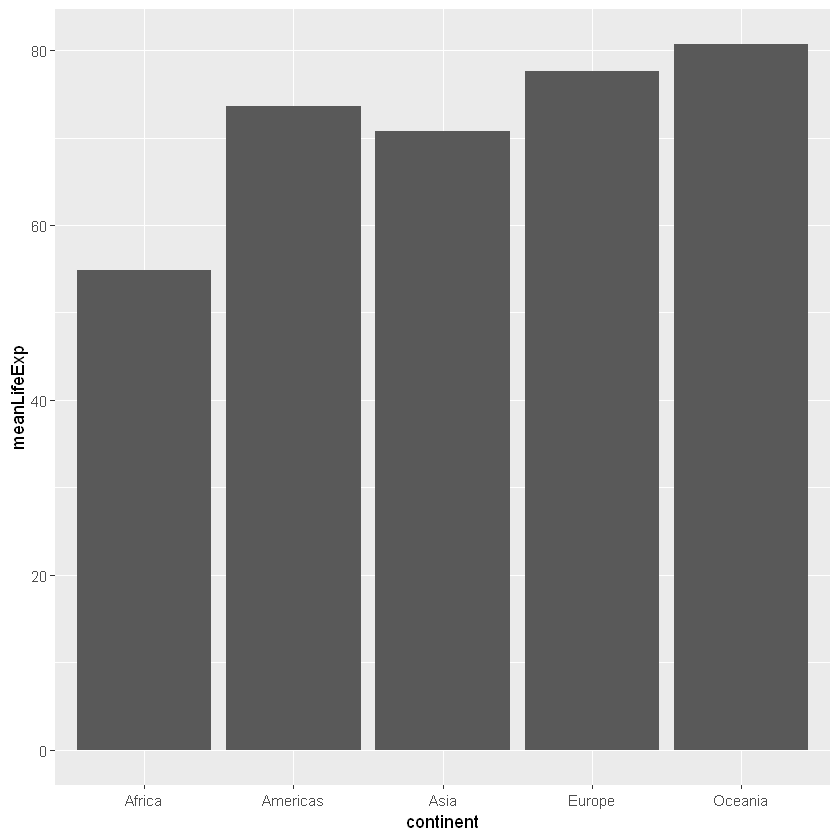

In [46]:
ggplot(by_continent, aes(x = continent, y = meanLifeExp)) +
    geom_col()

This makes it easy to see which continents have higher life expectancy than others. Notice that unlike scatter plots or line plots, bar plots always start at zero.

## Exercise

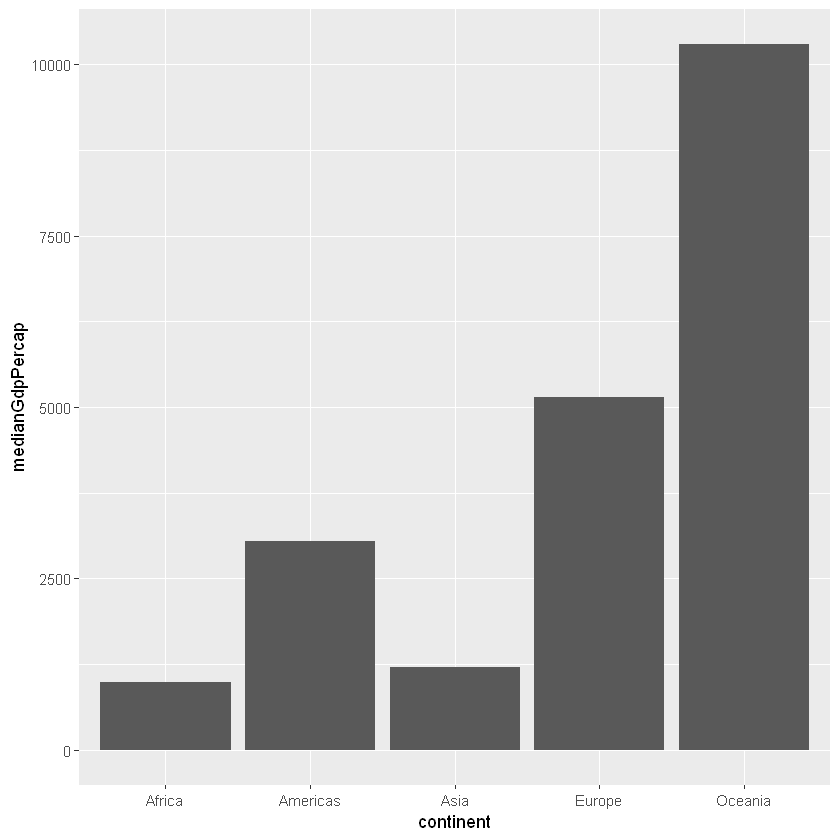

In [47]:
# Visualizing median GDP per capita by continent

# Summarize the median gdpPercap by continent in 1952
by_continent_1952 <- gapminder %>%
    filter(year == 1952) %>%
    group_by(continent) %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Create a bar plot showing medianGdp by continent
ggplot(by_continent_1952, aes(x = continent, y = medianGdpPercap)) + 
    geom_col()

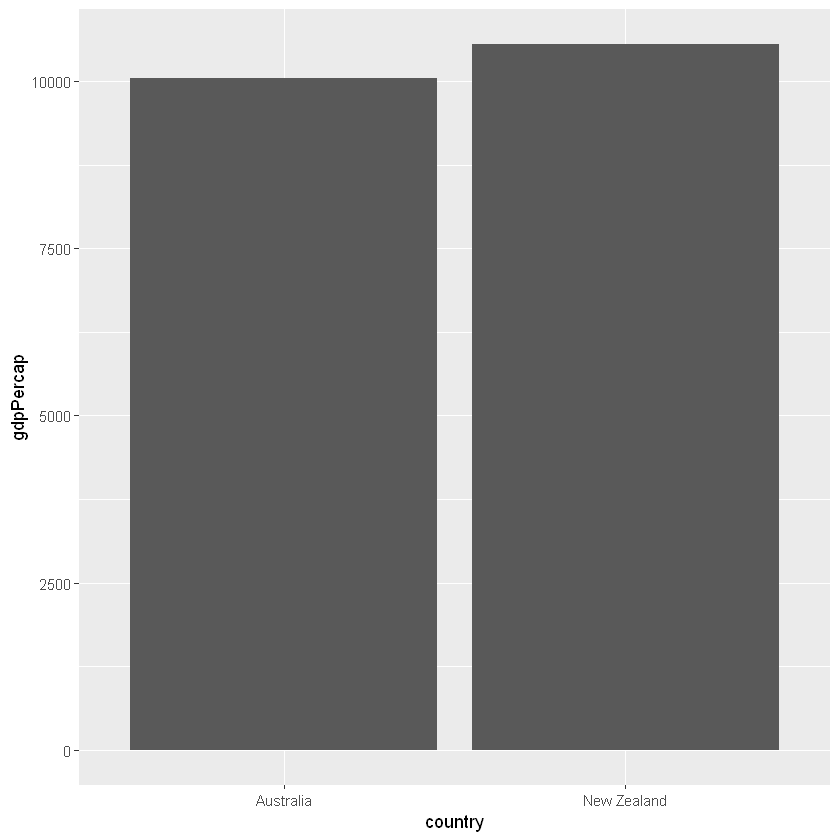

In [48]:
# Visualizing GDP per capita by country in Oceania
# Filter for observations in the Oceania continent in 1952
oceania_1952 <- gapminder %>%
    filter(continent == "Oceania", year == 1952)

# Create a bar plot of gdpPercap by country
ggplot(oceania_1952, aes(x = country, y = gdpPercap)) +
    geom_col()

*Looks like the GDP per capita of these two countries was similar in 1952.*

---
## Histograms
A histogram shows a distribution. In this case, it's the distribution of life expectancy across countries in the year 2007. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


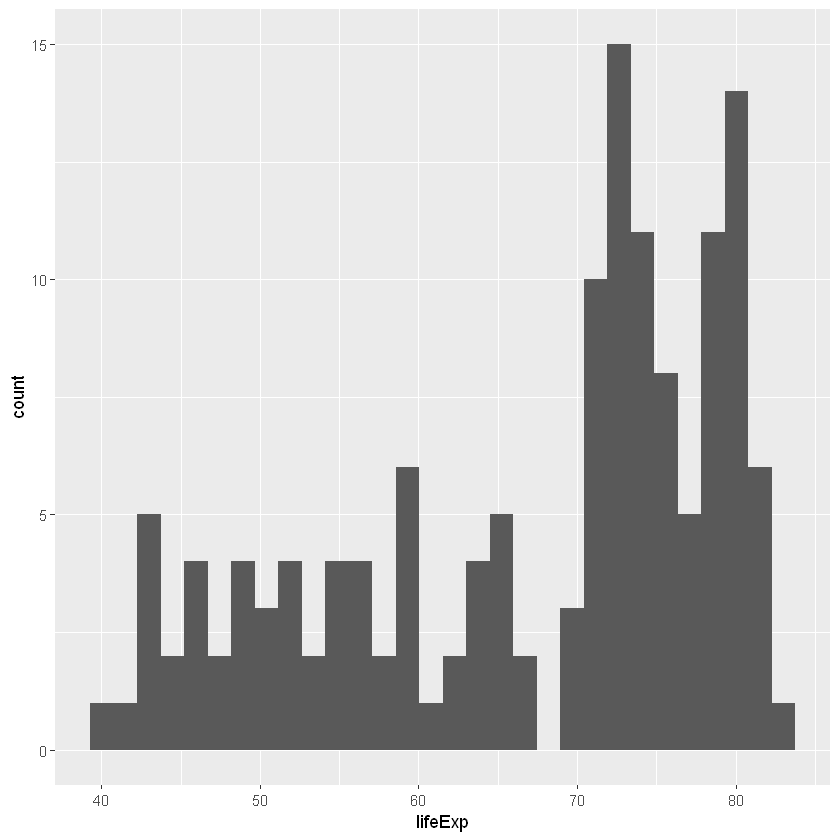

In [51]:
expectancy_2007 <- gapminder %>%
    filter(year == 2007)

ggplot(expectancy_2007, aes(x = lifeExp)) +
    geom_histogram()

Every bar represents a bin of life expectancies, and the height represents how many countries fall into that bin. This lets you get a sense of the distribution based on the histogram's shape. We can see that most countries have a life expectancy between 70 to 80 years, but that another set of countries have life expectancies between 40 and 65.

It has only one aesthetic: the x-axis, the variable whose distribution you are examining. The width of each bin in the histogram is chosen automatically, and it has a large effect on how the histogram communicates the distribution. 

### Adjusting bin width
You may need to customize that width. It is possible to do so with the binwidth option, which is set inside the parentheses of the geom underscore histogram layer. Setting binwidth equals 5 means that each of the bars in the histograms represents a width of five years.

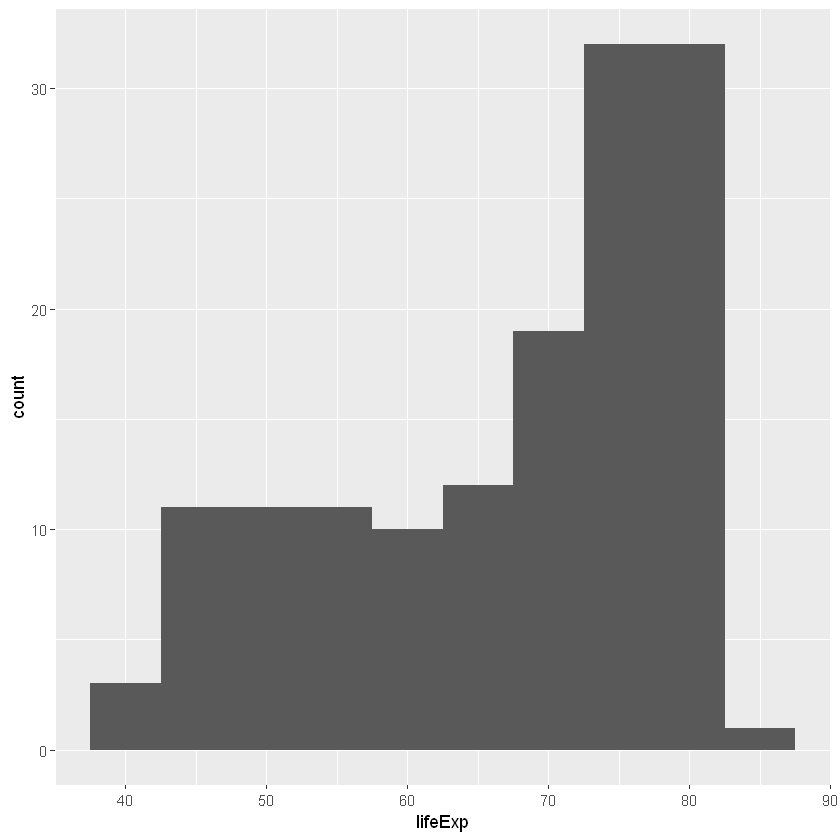

In [52]:
ggplot(expectancy_2007, aes(x = lifeExp)) +
    geom_histogram(binwidth = 5)

Setting a wide binwidth like this makes the histogram a bit blockier, which focuses on the general shape more than the small details. 

 In some cases, you may need to put the x-axis of a histogram on a log scale for it to be understandable.
 

## Exercise

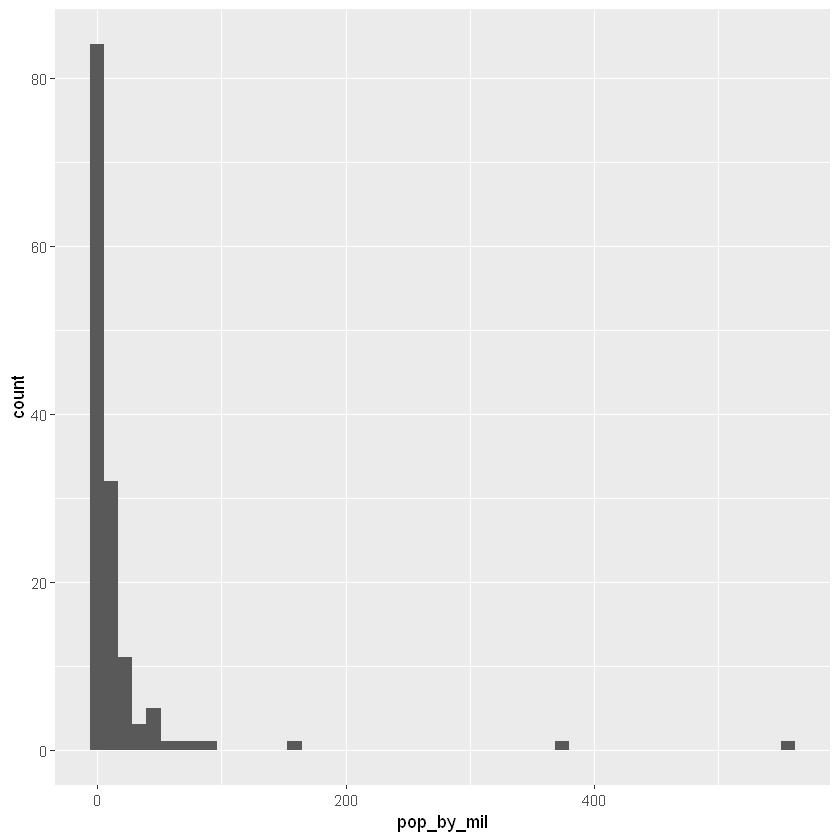

In [53]:
# Visualizing population

gapminder_1952 <- gapminder %>%
  filter(year == 1952) %>%
  mutate(pop_by_mil = pop / 1000000)

# Create a histogram of population (pop_by_mil)
ggplot(gapminder_1952, aes(x = pop_by_mil)) +
  geom_histogram(bins = 50)

*Notice that most of the distribution is in the smallest (leftmost) bins.*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


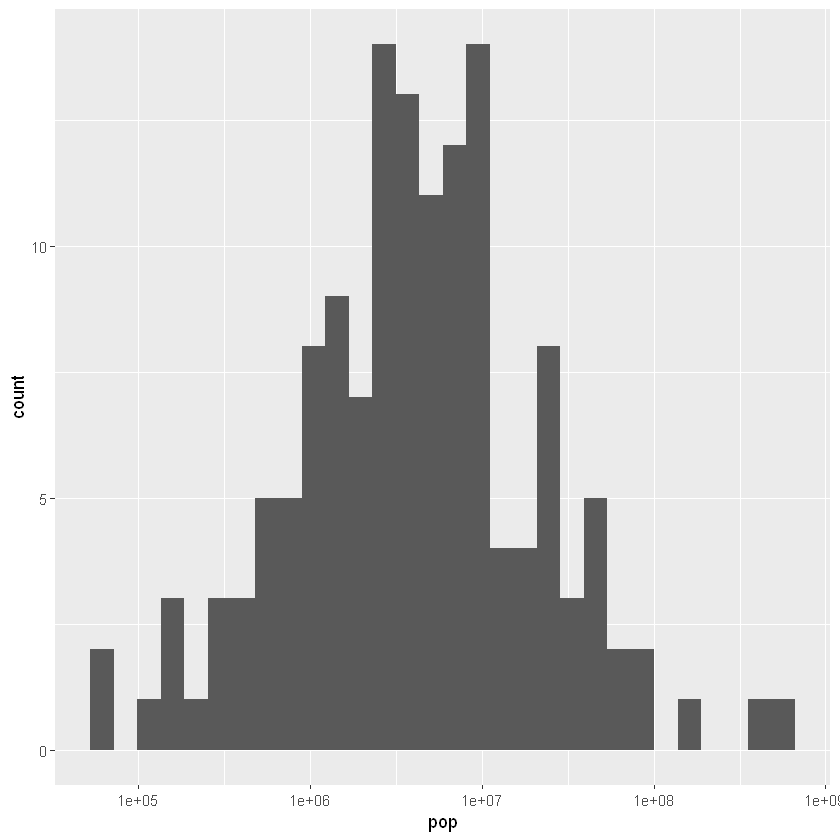

In [55]:
# Visualizing population with x-axis on a log scale

gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a histogram of population (pop), with x on a log scale
ggplot(gapminder_1952, aes(x = pop)) +
  geom_histogram() +
  scale_x_log10()

*Notice that on a log scale, the distribution of country populations is approximately symmetrical.*

---
## Boxplots
Recall that we used a histogram when we wanted to examine the distribution of one variable, such as life expectancy, across all countries. Notice that a histogram combines all the life expectancies across all continents, without distinguishing them. But what if your goal is to compare the distribution of life expectancies among continents?

### Box plots
This is a box plot, which shows the distribution of life expectancies within each continent, so that you can compare them.

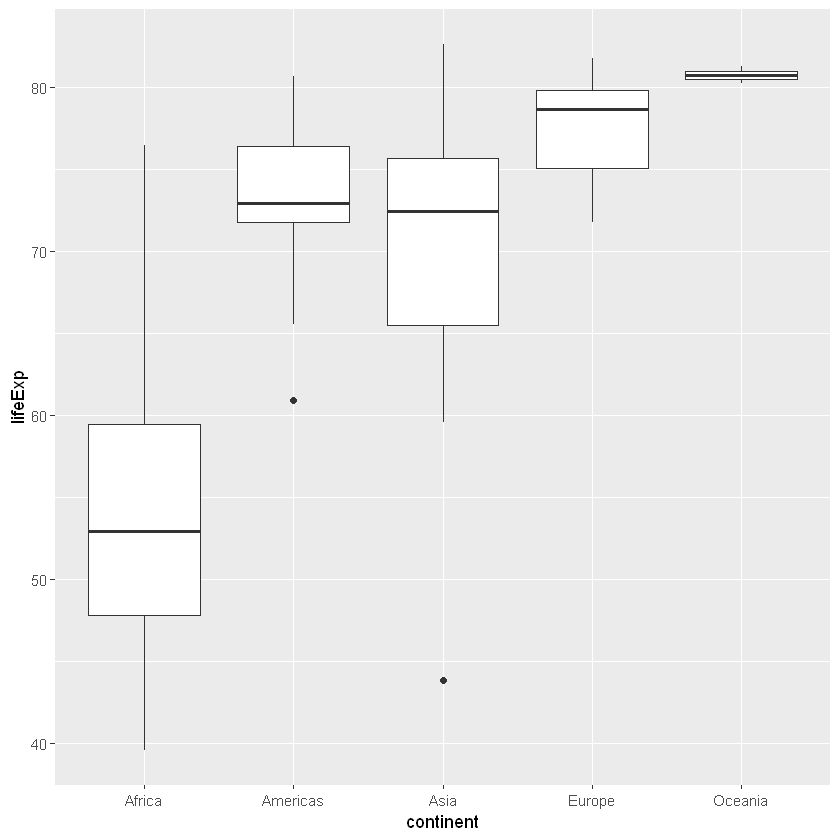

In [56]:
ggplot(expectancy_2007, aes(x = continent, y = lifeExp)) +
    geom_boxplot()

A box plot takes a bit of practice to interpret, so here's what each of the components means. 

- The black line in the middle of each white box is the **median** of that continent's distribution. 
- The top and bottom of each box represent the 75th percentile and the 25th percentile of that group, meaning half of the distribution lies within that box. 
- The lines going up and down from the box, called "whiskers", cover additional countries. 
- The two dots below the whiskers for Asia and the Americas represent outliers: countries with unusually low life expectancy relative to the rest of the distribution. 

So there's a lot that this plot tells us about differences in life expectancy across continents. We can see that the median life expectancy of Europe is one of the highest, and that the two countries in Oceana (Australia and New Zealand) both have very high values. We can also see that the distribution for Africa is unusually low, with about half of its countries having a life expectancy between 50 and 60 years.

### Histogram vs box plot
A boxplot helps give more context to the shape of the earlier histogram, where there were two bumps: one for countries between 65 and 80 representing most of Europe, Asia, and the Americas, and another, lower distribution.

## Exercise

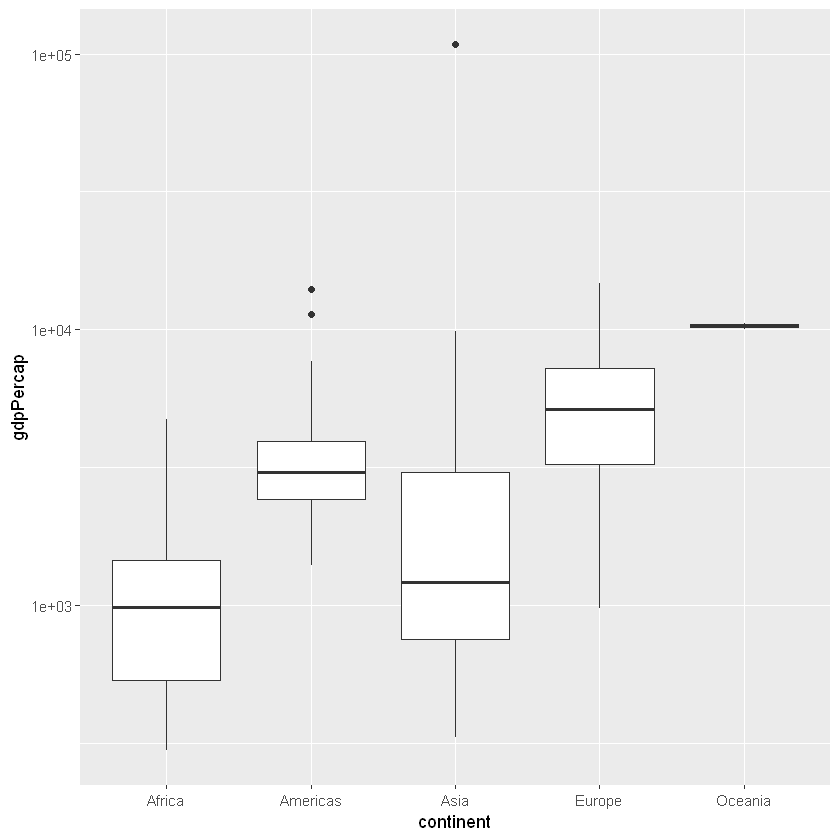

In [57]:
# Comparing GDP per capita across continents

gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a boxplot comparing gdpPercap among continents
ggplot(gapminder_1952, aes(x = continent, y = gdpPercap)) +
  geom_boxplot() +
  scale_y_log10()

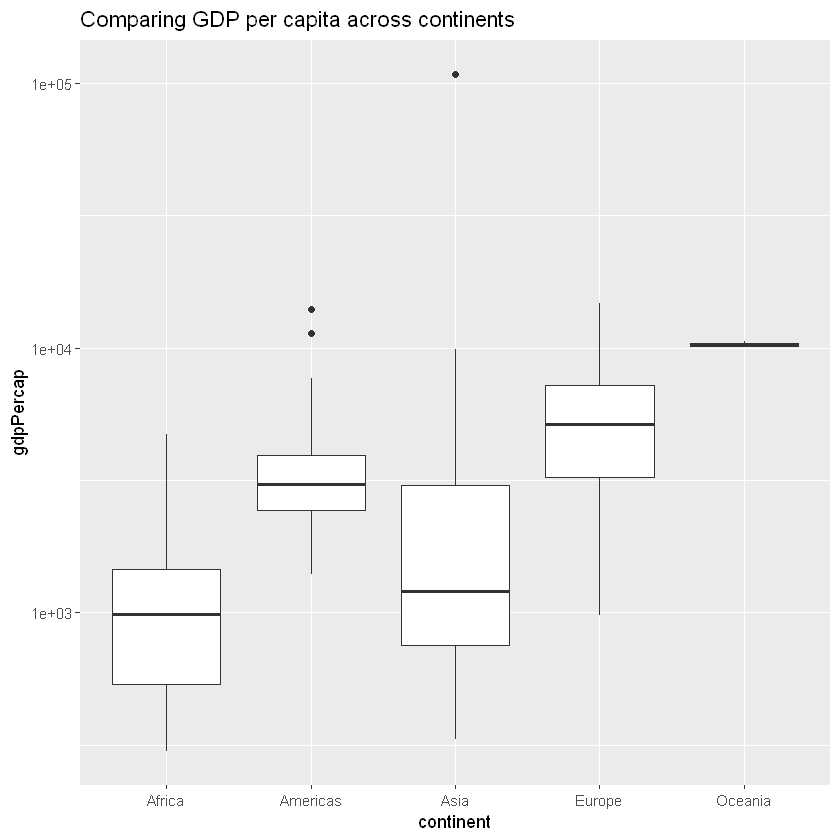

In [58]:
# Adding a title to your graph

gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Add a title to this graph: "Comparing GDP per capita across continents"
ggplot(gapminder_1952, aes(x = continent, y = gdpPercap)) +
  geom_boxplot() +
  scale_y_log10() + 
  ggtitle("Comparing GDP per capita across continents")